# The Cancer Genome Atlas cancer classifier

## Foreword

Cancer is perhaps the most impactful disease in modern life due to its current and future prevalence throughout the world. As our ability to prevent other life-threatening scenarios has historically increased via technological, scientific, and medical advancements cancer's collective impact has unfortunately also increased as a result of our longer lifespans. During my PhD studies in molecular biology I experienced first-hand how managing the increased societal burden from cancer requires especially creative and innovative problem solving due to the problematic nature of how cancer arises. After working with various large molecular datasets I became interested in the predictive capabilities of these types of data in the domain of cancer biology, so I decided to explore The Cancer Genome Atlas with the purpose of using computational methods to potentially improve cancer diagnosis.

## Introduction

Cancer is a complex disease ultimately caused by mutations to an organism's genetic code that cause uncontrolled cell division (for more information on how cancer arises please read [Hallmarks of Cancer: The Next Generation](http://dx.doi.org/10.1016/j.cell.2011.02.013)). Each instance of cancer is molecularly unique due to the many different ways and molecular contexts in which cancer can arise. While tumors of the same tissue type are often phenotypically similar, the different molecular events that lead to the formation of these tumors may cause them to look or act differently from each other, thus effectively dividing them into subclasses. This poses a challenge for oncologists since a pharmaceutical treatment that acts on a specific malfunctioning molecule or group of molecules may not be relevant for a patient that doesn't have a cancer subtype whose cause is related to the molecule(s) targetted by that drug. The ideal treatment of cancer must thus ultimately be tailored to the very specific conditions surrounding each instance in order for the treatment to be most effective. 

The different molecular signatures of each instance of cancer not only complicate the treatment process but also pose the more basic challenge of accurately identifying the cancer type in the first place. Historically, cancer type has been determined by pathology techniques primarily based on histological examination of primary tumor biopsies. Difficulties arise, however, when a patient presents with a cancer of unknown primary origin or when the tumor biopsy shows phenotypes sufficiently similar to multiple types of cancer. In these ambiguous cases, it is necessary to get more information that can help identify the type of cancer. Determining the molecular signature of a tumor has thus become a common procedure, and genomics methods like DNA and RNA sequencing have augmented the older pathology techniques to aid in both discovering cancer subtypes and helping to develop treatments for them.

## Purpose

I aimed to make a proof of concept classifier for cancer type that could aid in cancer diagnosis using The Cancer Genome Atlas's extensive collection of large scale molecular datasets gathered from many different cancer patients. My first aim was to explore whether or not the molecular signatures of cancers could be defined well enough using data in the TCGA repository to use for prediction of high level cancer type. If this was possible my second aim was to pare down the number of molecular features needed to determine cancer type in order to decrease the potential monetary and time cost of such an analysis. For example, the difference in the pricing for deep sequencing a whole human genome versus a single gene is about three orders of magnitude, so sequencing a whole genome to find all the mutations in a patient is likely to be overkill if only a subset of the genes or genomic features are needed to effectively predict the cancer type. For the future I also hope to extend this procedure to cancer subtypes in order to give it more diagnostic relevance.

## Implementation

The Cancer Genome Atlas (TCGA) is an effort by the National Institutes of Health to catalog and store molecular, demographic, and medical data gathered from cancer patients for scientific study. The type of molecular data TCGA stores includes large genomic datasets like those generated by experiments like RNA-seq or whole exome sequencing. I gathered certain molecular data types from many patients from the database and used the data for analysis and construction of a classifier that determines the cancer type from a given input set of molecular data. Note that the original and some of the processed data files were left out of this repository for size reasons. Instructions on how to get the original data and how to generate the processed data are found in the data directory.

For my analyses I focused on the RNA-seq-based messenger RNA (mRNA) and micro RNA (miRNA) data types. While there are various other types of molecular data housed in TCGA like single nucleotide polymorphisms, mutations, or DNA methylation levels I chose mRNA and miRNA data due to their ability to describe the genome-wide expression state of the cancers as well as the procedural ease and lower cost of acquiring these data in the lab compared to other types of molecular data. Exploratory data analysis revealed that many genes covaried and formed clusters of similar genes, which suggested I would be successful in paring down of the dataset to accomplish my second aim. After some quick initial testing of various types of models I settled on a LightGBM classifier with a traditional gradient boosting decision tree (gbdt) boosting type, a multiclass (multiclass) objective, and a multiclass log loss (multi_logloss) evaluation metric. I first made individual models for each data type after randomly splitting each data set into 5 different training and test sets for a 5-fold cross validation to help prevent overfitting. The top 100 RNAs (features) of the models were then extracted for use in smaller classifiers (to accomplish the second aim of the purpose section). I finally aggregated the top features from each data type into an aggregate classifier.

All analyses were performed in Python on an Intel Core i7 7700 system with 32 GB of memory. Important packages used were jupyter notebook, scikit-learn, lightgbm, pandas, numpy, matplotlib, and seaborn among others.

## Results

Cross validation determined the full messenger and micro RNA models to have average F1 scores of 0.95 and 0.94 (Tables I and II), respectively, when using a dataset of about 11000 samples of each data type from about 5000 different cases. These high classification scores suggest that we can check off the initial aim to see if these data are sufficient to classify cancer types.

#### Table I - Messenger RNA model classification report

In [1]:
import pickle, warnings
from sklearn.metrics import classification_report, confusion_matrix
warnings.filterwarnings('ignore')
actual_y_mrna = []
pred_y_mrna = []
for i in range(5):
    with open('../data/new_mrna_data_classifier_and_evaluation_data_'+str(i)+'_all_feats.pkl', 'rb') as f:
        meta_data = pickle.load(f)
    actual_y_mrna += meta_data['actual_y']
    pred_y_mrna += meta_data['predictions']
print(classification_report(actual_y_mrna, pred_y_mrna))

             precision    recall  f1-score   support

        ACC       0.97      0.99      0.98       142
       BLCA       0.97      0.95      0.96       664
       BRCA       0.99      0.99      0.99      2075
       CESC       0.96      0.92      0.94       501
       CHOL       0.82      0.54      0.65        78
       COAD       0.83      0.96      0.89       823
       DLBC       0.87      1.00      0.93        75
       ESCA       0.93      0.88      0.90       291
        GBM       0.99      0.96      0.98       288
       HNSC       0.97      0.98      0.97       906
       KICH       0.86      0.88      0.87       163
       KIRC       0.97      0.96      0.96      1010
       KIRP       0.94      0.91      0.93       541
       LAML       1.00      0.99      0.99       240
        LGG       0.99      1.00      0.99       858
       LIHC       0.95      0.98      0.97       745
       LUAD       0.91      0.97      0.94       997
       LUSC       0.96      0.89      0.92   

#### Table II - Micro RNA model classification report

In [2]:
actual_y_mirna = []
pred_y_mirna = []
for i in range(5):
    with open('../data/new_mirna_data_classifier_and_evaluation_data_'+str(i)+'_all_feats.pkl', 'rb') as f:
        meta_data = pickle.load(f)
    actual_y_mirna += meta_data['actual_y']
    pred_y_mirna += meta_data['predictions']
print(classification_report(actual_y_mirna, pred_y_mirna))

             precision    recall  f1-score   support

        ACC       0.98      0.96      0.97        98
       BLCA       0.91      0.91      0.91       547
       BRCA       0.98      0.99      0.98      1493
       CESC       0.89      0.88      0.89       373
       CHOL       0.76      0.53      0.63        49
       COAD       0.81      0.91      0.86       628
       DLBC       0.87      0.96      0.91        72
       ESCA       0.84      0.63      0.72       276
        GBM       0.00      0.00      0.00         5
       HNSC       0.95      0.95      0.95       705
       KICH       0.88      0.88      0.88       111
       KIRC       0.98      0.97      0.97       755
       KIRP       0.94      0.93      0.94       397
       LAML       0.99      1.00      1.00       135
        LGG       0.99      1.00      0.99       683
       LIHC       0.95      0.98      0.97       513
       LUAD       0.92      0.94      0.93       716
       LUSC       0.91      0.89      0.90   

Most of the 33 different cancer types (for names and abbreviations see the end of this notebook) had both precision and recall scores of over 0.9 with a few types being frequently misclassified. Upon closer inspection of these misclassification events it became apparent that cancers of the same organ (e.g. glioblastoma multiforme and lower grade glioma, both found in the brain) or of closely related tissues in the same organ system (e.g. esophageal carcinoma and stomach adenocarcinoma) tended to make up the bulk of the errors. This phenomenon can be seen below in the confusion matrix for each model (Figures 1 and 2).

#### Figure 1 - Messenger RNA model confusion matrix

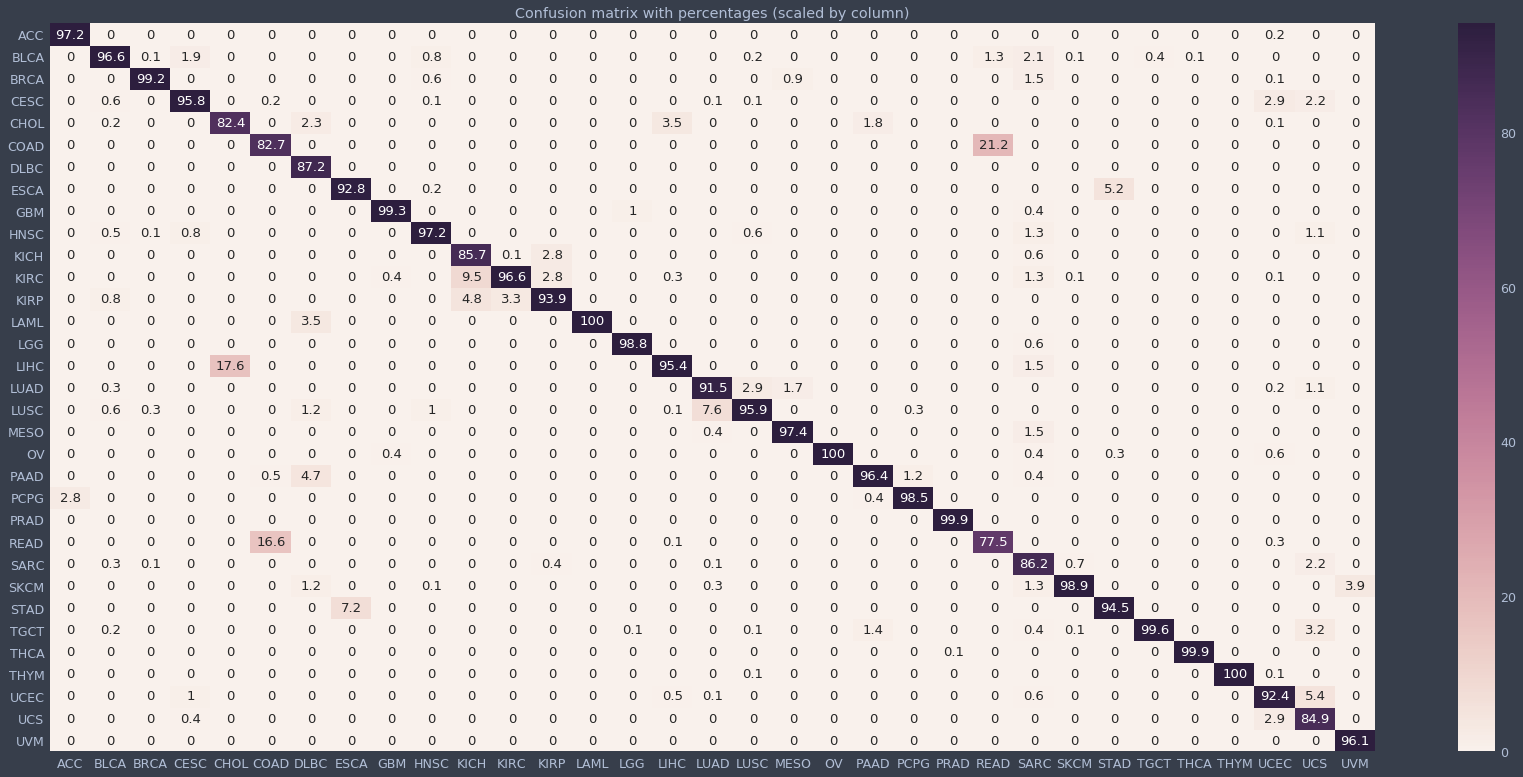

In [3]:
%matplotlib inline
import seaborn as sns, pandas as pd, matplotlib.pyplot as plt, jupyterthemes.jtplot as jtplot
jtplot.style('onedork')
def makeConfusionMatrixPlot(all_y_test, all_y_preds):
    labels = sorted(list(set(all_y_test)))
    cnf = confusion_matrix(all_y_test, all_y_preds, labels = labels)
    df_cm = pd.DataFrame(cnf, index = labels, columns = labels)
    df_cm = round(100*(df_cm / df_cm.sum()), 1)
    plt.figure(figsize = (24,11))
    sns.heatmap(df_cm, annot=True, fmt = '1g', robust = True)
    plt.title('Confusion matrix with percentages (scaled by column)')
    plt.show()
makeConfusionMatrixPlot(actual_y_mrna, pred_y_mrna)

#### Figure 2 - Micro RNA model confusion matrix

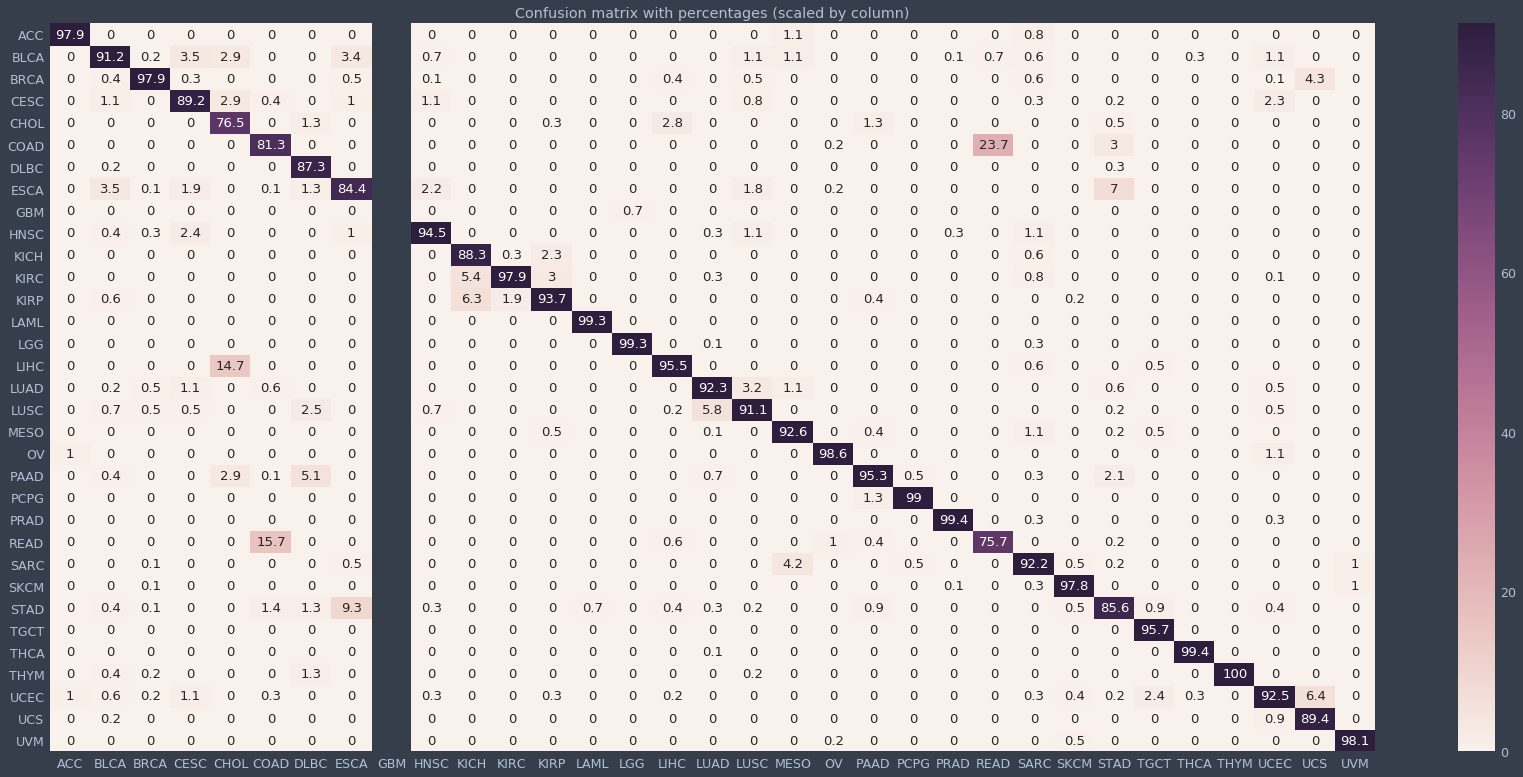

In [4]:
makeConfusionMatrixPlot(actual_y_mirna, pred_y_mirna)

The fact that cancers from the same organ were frequently misclassified is a logically intuitive result since the cells within organs are generally more similar than cells between organs, thus it would be expected that tumors that arise from cells in the same organ would be more similar to each other than tumors from different organs. To get a better look at this phenomenon I clustered the average molecular profiles for the top 10000 mRNAs (Figure 3) in an effort to show the levels of similarity between each cancer type. From this figure it can be seen that cancers of similar tissue origin or similar organ system are indeed molecularly similar as they cluster together.

#### Figure 3 - Hierarchical clustering of molecular cancer profiles

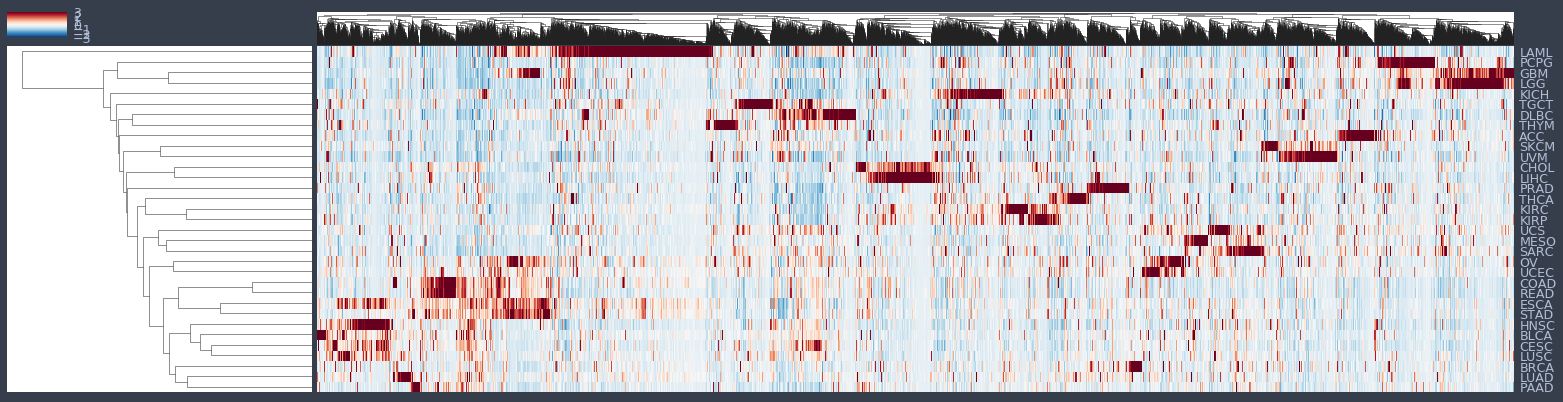

In [5]:
df = pd.read_csv('../data/mrna_top_10000_feats_average_data_for_clustering.csv', index_col = 0)
g = sns.clustermap(df, figsize = (27, 7), vmin = -3, vmax = 3, xticklabels = False)
_ = plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)

In an effort to accomplish my second aim of decreasing the number of features needed for classification I made small models for each data type using only their top 100 features. These models had similar predictive capability, each achieving F1 scores of 0.94 (Tables III and IV). But for a few exceptions the strengths and weaknesses of each individual model mostly overlapped with the other model as can be seen from the confusion matrices (Figures 4 and 5). Interestingly the miRNA model completely failed to make an accurate prediction for glioblastomas, a fact probably influenced by the low number of glioblastoma samples in the dataset. The miRNA model did, however, do considerably better at correctly predicting cholangiocarcinomas and uterine carcinosarcomas.

#### Table III - mRNA top features model classification report

In [6]:
actual_y_mrna = []
pred_y_mrna = []
for i in range(5):
    with open('../data/new_mrna_data_classifier_and_evaluation_data_'+str(i)+'_top_feats.pkl', 'rb') as f:
        meta_data = pickle.load(f)
    actual_y_mrna += meta_data['actual_y']
    pred_y_mrna += meta_data['predictions']
print(classification_report(actual_y_mrna, pred_y_mrna))

             precision    recall  f1-score   support

        ACC       0.94      0.99      0.96       142
       BLCA       0.96      0.93      0.94       664
       BRCA       0.99      0.99      0.99      2075
       CESC       0.96      0.91      0.94       501
       CHOL       0.73      0.46      0.57        78
       COAD       0.85      0.94      0.89       823
       DLBC       0.84      0.91      0.87        75
       ESCA       0.89      0.82      0.85       291
        GBM       0.98      0.95      0.97       288
       HNSC       0.96      0.98      0.97       906
       KICH       0.78      0.68      0.73       163
       KIRC       0.92      0.94      0.93      1010
       KIRP       0.92      0.88      0.90       541
       LAML       1.00      0.99      0.99       240
        LGG       0.98      0.99      0.98       858
       LIHC       0.95      0.97      0.96       745
       LUAD       0.92      0.94      0.93       997
       LUSC       0.93      0.88      0.91   

#### Figure 4 - mRNA top features model confusion matrix

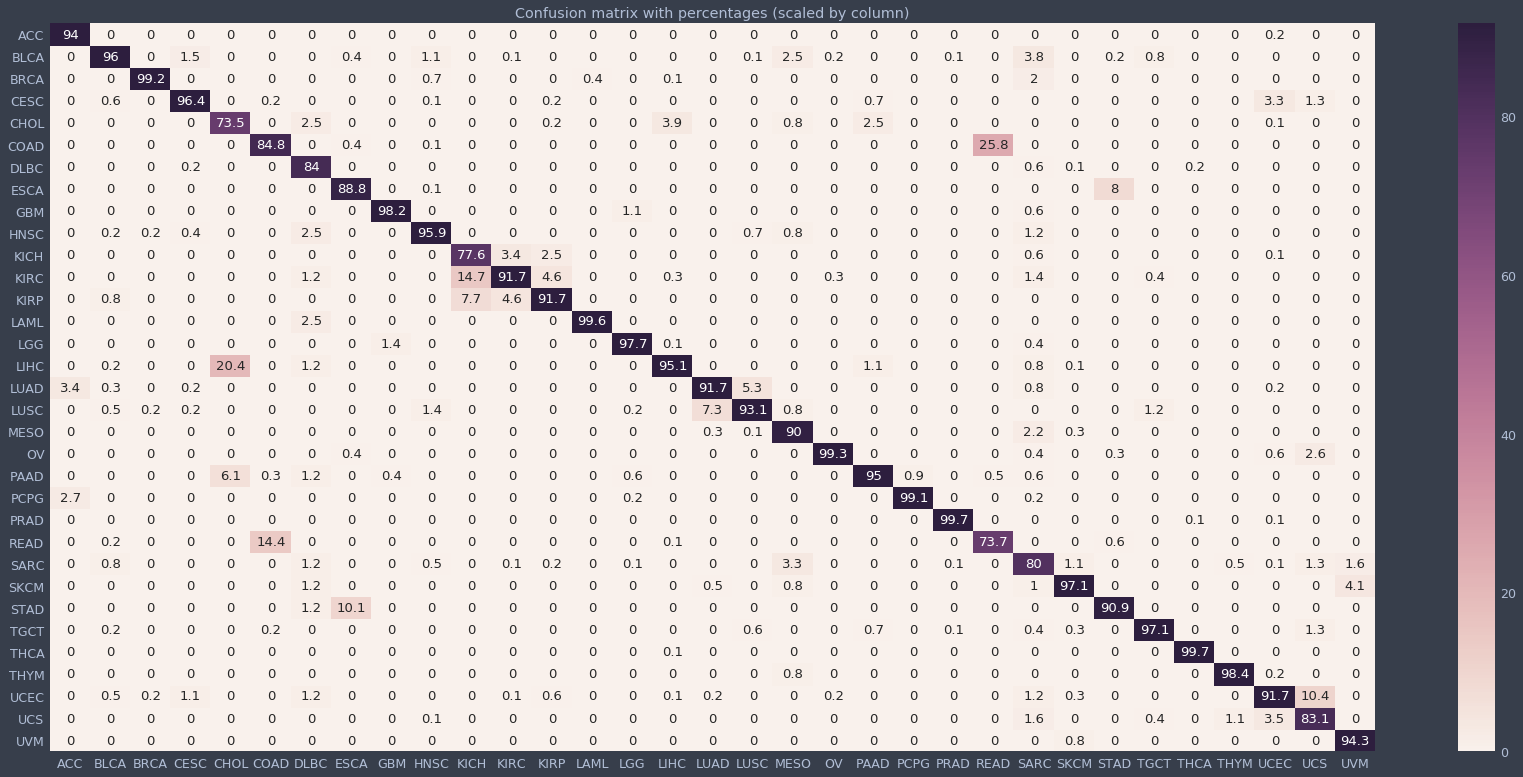

In [7]:
jtplot.style('onedork')
makeConfusionMatrixPlot(actual_y_mrna, pred_y_mrna)

#### Table IV - miRNA top features model classification report

In [8]:
actual_y_mirna = []
pred_y_mirna = []
for i in range(5):
    with open('../data/new_mirna_data_classifier_and_evaluation_data_'+str(i)+'_top_feats.pkl', 'rb') as f:
        meta_data = pickle.load(f)
    actual_y_mirna += meta_data['actual_y']
    pred_y_mirna += meta_data['predictions']
print(classification_report(actual_y_mirna, pred_y_mirna))

             precision    recall  f1-score   support

        ACC       0.92      0.97      0.95       109
       BLCA       0.89      0.89      0.89       537
       BRCA       0.98      0.99      0.98      1510
       CESC       0.87      0.87      0.87       385
       CHOL       0.92      0.52      0.67        46
       COAD       0.83      0.91      0.87       584
       DLBC       0.93      0.94      0.93        53
       ESCA       0.82      0.62      0.71       267
        GBM       0.00      0.00      0.00         8
       HNSC       0.94      0.96      0.95       712
       KICH       0.89      0.86      0.88       136
       KIRC       0.97      0.97      0.97       753
       KIRP       0.92      0.92      0.92       406
       LAML       0.99      1.00      1.00       139
        LGG       0.98      1.00      0.99       652
       LIHC       0.96      0.99      0.98       521
       LUAD       0.95      0.94      0.94       700
       LUSC       0.91      0.92      0.91   

#### Figure 5 - miRNA top features model confusion matrix

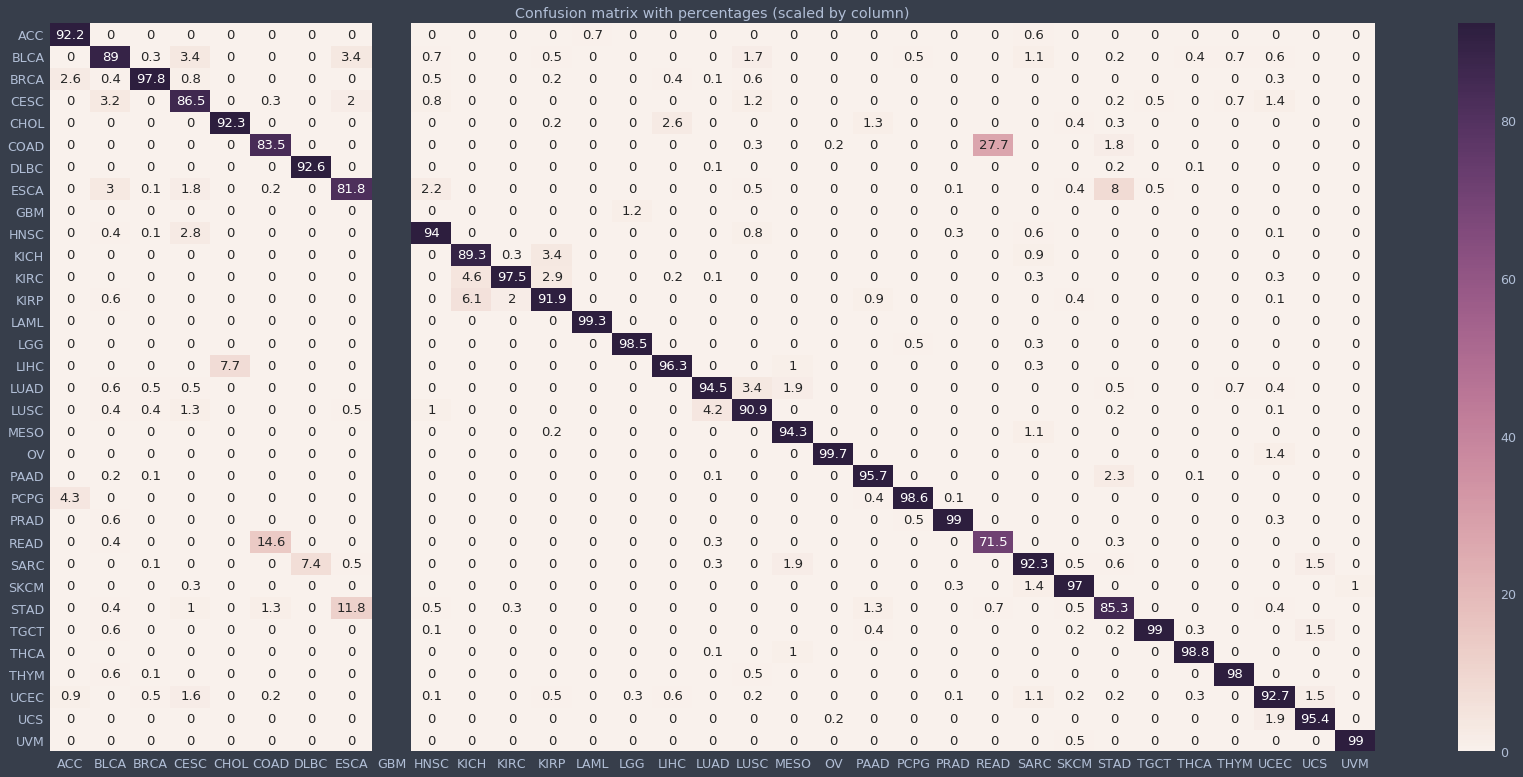

In [9]:
jtplot.style('onedork')
makeConfusionMatrixPlot(actual_y_mirna, pred_y_mirna)

Since the deficiencies of each model overlapped significantly but for a few exceptions it was unlikely that a combination of the models would make up for the weaknesses of each one. To see if this was the case I made a new model using the top 100 most predictive RNAs from each model. Overall, the combined model had an average F1 score of 0.93 (Table V), producing similar numbers of misclassification events on the whole and failing to effectively outperform most of the best cases in either of the individual models (Figure 6). Ultimately, the places where the combined model made up for the weaknesses of an individual model were offset by the increases in misclassification events for other cancer types. Given the ease and ubiquity of the methods for measuring mRNA levels from a biological sample the top features mRNA model thus appears to be the best combination of simplicity and effectiveness.

#### Table V - Combined model classification report

In [10]:
actual_y = []
pred_y = []
for i in range(5):
    with open('../data/new_combined_model_data_classifier_and_evaluation_data_'+str(i)+'.pkl', 'rb') as f:
        meta_data = pickle.load(f)
    actual_y += meta_data['actual_y']
    pred_y += meta_data['predictions']
print(classification_report(actual_y, pred_y))

             precision    recall  f1-score   support

        ACC       0.93      0.95      0.94       704
       BLCA       0.93      0.92      0.92      3367
       BRCA       0.98      0.99      0.99     10067
       CESC       0.93      0.88      0.90      2574
       CHOL       0.68      0.45      0.54       360
       COAD       0.82      0.92      0.87      3987
       DLBC       0.90      0.93      0.91       357
       ESCA       0.79      0.73      0.76      1525
        GBM       0.96      0.93      0.94       876
       HNSC       0.95      0.97      0.96      4563
       KICH       0.81      0.80      0.81       731
       KIRC       0.95      0.95      0.95      5021
       KIRP       0.91      0.91      0.91      2651
       LAML       1.00      1.00      1.00      1096
        LGG       0.99      0.99      0.99      4480
       LIHC       0.95      0.97      0.96      3470
       LUAD       0.91      0.93      0.92      4743
       LUSC       0.92      0.89      0.90   

#### Figure 6 - Combined model confusion matrix

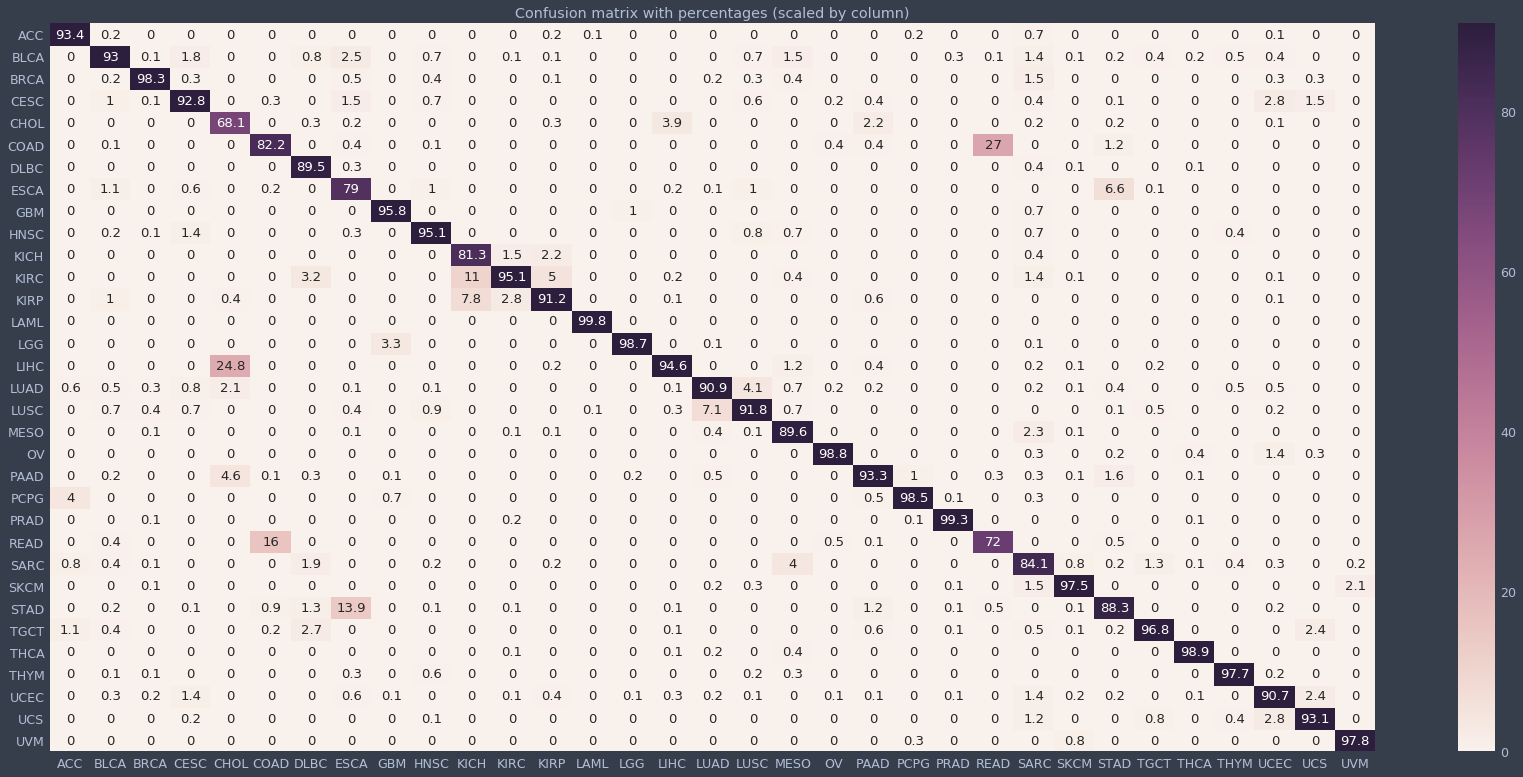

In [11]:
jtplot.style('onedork')
makeConfusionMatrixPlot(actual_y, pred_y)

## Discussion and future directions

My results here demonstrate the potential of genomics methods in cancer diagnosis. From TCGA's large collection of molecular data I constructed a simple classifier that predicted cancer type with high overall accuracy. In an effort to decrease the potential cost and work load of acquiring genome-wide mRNA measurements I pared the model down to the top 100 features without much loss in overall accuracy or predictive capability. As a disclaimer I should say that this work was mainly meant as a fun little personal project, and as such it is not peer reviewed or evaluated for real-world accuracy in any way. I thus strongly advise against using it to make healthcare decisions. While these models perform well given the TCGA data there are various considerations to take into account. 

First and foremost, molecular biology techniques require a great deal of care and precision in their implementation, and their results are highly dependent on factors like temperature, reagent freshness, experimenter, and many others. Often times only slight differences in seemingly inconsequential parts of a protocol can cause significant levels of variation, which makes these protocols highly susceptible to batch effects. While there is a bit of variation in the origin of the different samples in the TCGA database, it is very likely that data generated from any new source will be muddied by the aforementioned factors. This should cause the model to perform less well in a scenario with many different data generation sources. In the future I would like to integrate data from other sources into the model to provide it with more robustness.

A second consideration is the effect of cell type on the predictive ability of the models. It is likely that cell type is one of the primary signals that distinguishes between the cancer types, and this could have important implications for how biopsies are collected. 
Since the strategy for use of these models is to try to help identify cancers of unknown primary origin, the tumors from which biopsies are gathered may be metastases and will thus probably be of a different cell type than the surrounding tissue of the organ in which they reside. Thus, if a biopsy is collected that has a mix of the organ tissue and the tumor then the resulting molecular datasets generated from the sample will confound the models and produce inaccurate results. Biopsy procedures must take this into account when thinking about using this type of modeling strategy.

Third, it should be noted that RNA is a very unstable molecule for various reasons, and experiments that measure RNA levels are generally only done on fresh samples that have been prepared with specific precautions to prevent the degradation of RNA. This type of strategy will thus not work well on previously acquired samples not prepared in the proper way for RNA quantification. Instead, models using DNA sequence-based data such as single nucleotide polymorphisms or mutations would be more appropriate for these cases.

The fourth consideration is that this dataset currently contains no non-tumor data and thus cannot distinguish cancer from non-cancer. I would like the model to ideally be able to make this distinction, and in the future I plan to integrate non-cancer data into the model.

Finally, it should be noted that the approach of this project was meant to be a practical application of science as opposed to a study that furthers our knowledge of cancer. This project thus does little to help understand the underlying causes of each of the cancer types. To this end the best that can be done from this type of analysis is simply observing the most important features in the models and using this information to attempt to discern what molecular changes have occurred in the cell compared to a non-cancerous cell of the same type. Because the world inside a cell is incredibly complex it takes studies of very creative scientific inquiry to truly make progress in our understanding of cancer biology. This project builds upon those types of studies as a translation of their efforts into a practical tool to help accomplish our ultimate goal of solving the cancer problem.

## Cancer type abbreviations

ACC: Adrenocortical Carcinoma

BLCA: Bladder Urothelial Carcinoma

BRCA: Breast Invasive Carcinoma

CESC: Cervical Squamous Cell Carcinoma and Endocervical Adenocarcinoma

CHOL: Cholangiocarcinoma

COAD: Colon Adenocarcinoma

DLBC: Lymphoid Neoplasm Diffuse Large B-cell Lymphoma

ESCA: Esophageal Carcinoma

GBM: Glioblastoma Multiforme

HNSC: Head and Neck Squamous Cell Carcinoma

KICH: Kidney Chromophobe

KIRC: Kidney Renal Clear Cell Carcinoma

KIRP: Kidney Renal Papillary Cell Carcinoma

LAML: Acute Myeloid Leukemia

LIHC: Liver Hepatocellular Carcinoma

LLG: Brain Lower Grade Glioma

LUAD: Lung Adenocarcinoma

LUSC: Lung Squamous Cell Carcinoma

MESO: Mesothelioma

OV: Ovarian Serous Cystadenocarcinoma

PAAD: Pancreatic Adenocarcinoma

PCPG: Pheochromocytoma and Paraganglioma

PRAD: Prostate Adenocarcinoma

READ: Rectum Adenocarcinoma

SARC: Sarcoma

SKCM: Skin Cutaneous Melanoma

STAD: Stomach Adenocarcinoma

TGCT: Testicular Germ Cell Tumors

THCA: Thyroid Carcinoma

THYM: Thymoma

UCEC: Uterine Corpus Endometrial Carcinoma

UCS: Uterine Carcinosarcoma

UVM: Uveal Melanoma